# Regularized Linear Regression Project

### US county-level sociodemographic and health resource data (2018-2019)

- Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data. To do this, we need to set a target variable (health-related) to conduct the analysis.

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
# Dataset Shape Analysis

total_data.shape

(3140, 108)

In [3]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
# Dataset Info 

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Get null and type info

pd.set_option('display.max_rows', None)

column_data = pd.DataFrame({
        'Non-Null Count': total_data.count(),
        'Null Count': total_data.isnull().sum(),
        'Data Type': total_data.dtypes
        })

column_data

,Non-Null Count,Null Count,Data Type
fips,3140,0,int64
TOT_POP,3140,0,int64
0-9,3140,0,int64
0-9 y/o % of total pop,3140,0,float64
19-Oct,3140,0,int64
10-19 y/o % of total pop,3140,0,float64
20-29,3140,0,int64
20-29 y/o % of total pop,3140,0,float64
30-39,3140,0,int64
30-39 y/o % of total pop,3140,0,float64


In [6]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: ['COUNTY_NAME', 'STATE_NAME']
Numerical variables: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 20

- There are many variables and we need to do one first selection. By reducing the number of columns, we can improve our model.

In [7]:
# Trimm the Categoric (String) 
total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1, inplace=True)

- Divide train and test -> Normalize the data -> Select the variables -> Join train and test -> Develop EDA with first selected data.

In [8]:
from sklearn.model_selection import train_test_split

num_variables = total_data.drop('Heart disease_prevalence', axis=1).columns

# We divide the dataset into training and test samples

X = total_data.drop('Heart disease_prevalence', axis = 1)[num_variables]
y = total_data['Heart disease_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,10002,12.5,11.7,13.4,12987,3.4,3.2,3.6,3490,4


Important remark: Only predictor variables should be scaled, never the target.

In [9]:
# Normalize the data:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])

In [10]:
# Create a new dataset with numeric variables normalized and the target variable.

total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026


In [11]:
# Feature Selection:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Divide dataset in train and test:

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Store the index values of the training and testing datasets:

train_indices = list(X_train.index)
test_indices = list(X_test.index)

# KBest Selection for the best Features

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454


In [12]:

X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.303292,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.853184,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.277451,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.197267,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.659217,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804


In [13]:
# Combine and save datasets:

X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [14]:
# Concatenate and save the new dataset:

total_data = pd.concat([X_train_sel, X_test_sel])

# Save dataset:

total_data.to_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/raw/total_data.csv', index=False)

total_data.head()


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [15]:
# EDA with treated dataset:

# Dataset Shape Analysis

total_data.shape


(3140, 32)

In [16]:
# Dataset info:

print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 0 to 627
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               3140 non-null   float64
 1   0-9                                                   3140 non-null   float64
 2   19-Oct                                                3140 non-null   float64
 3   20-29                                                 3140 non-null   float64
 4   30-39                                                 3140 non-null   float64
 5   40-49                                                 3140 non-null   float64
 6   50-59                                                 3140 non-null   float64
 7   60-69                                                 3140 non-null   float64
 8   70-79                                                 3140 non-n

In [17]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: []
Numerical variables: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Heart disease_number']


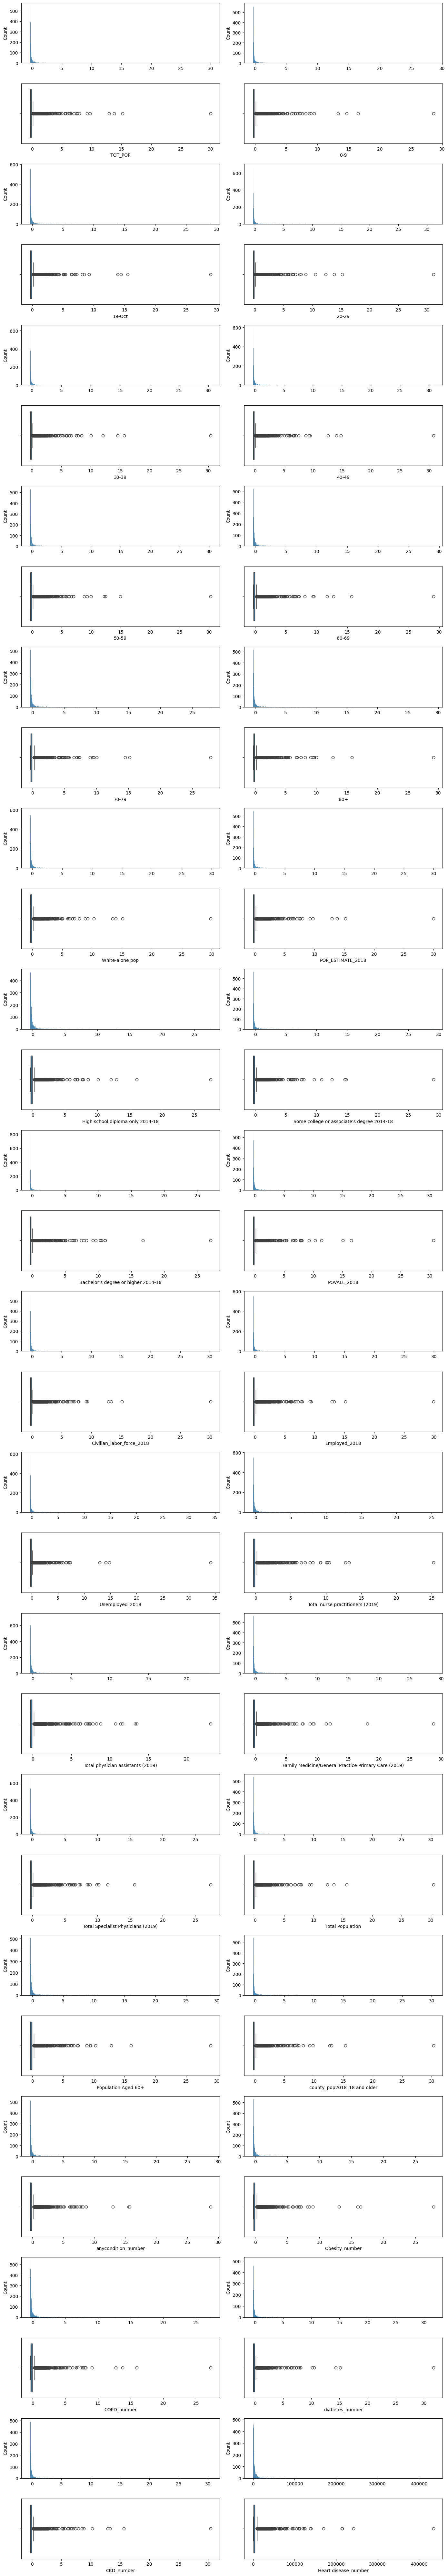

In [20]:
# Univariate Data Analysis

# Numerical Univariate Analysis: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Heart disease_number']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots with custom height ratios:

fig, axis = plt.subplots(32, 2 , figsize=(14, 80))

# List of column names from your dataset:

column_names = total_data.columns

# Iterate through each column and plot histograms and box plots:

for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=total_data, x=col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=total_data, x=col_name)

# Adjust Layout

plt.tight_layout()

# Plot the Data

plt.show()

Conclusions:

- The categories sex and region are quite homogeneous.
- There are much more people non-smokers compared to smokers.

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

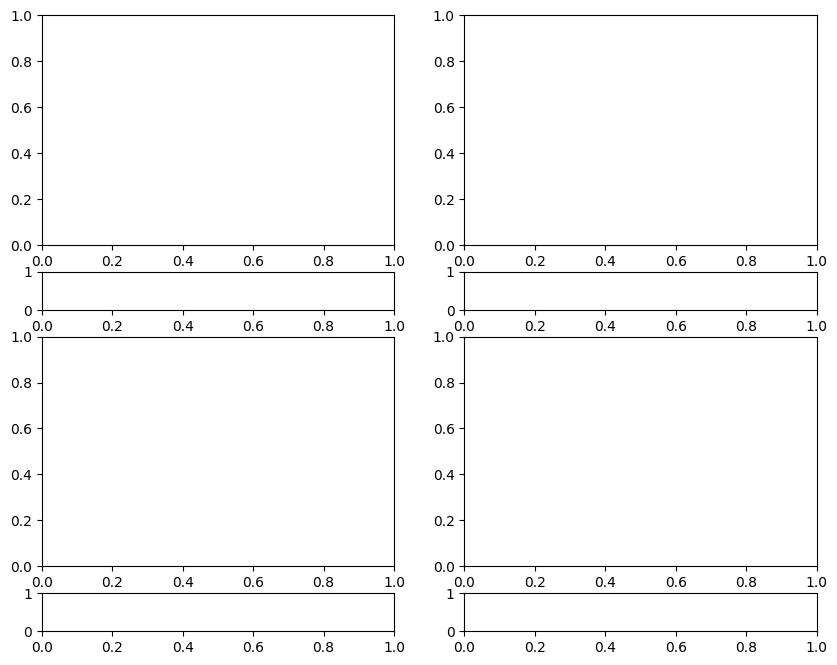

In [19]:
# Univariate Data Analysis

# Numerical Univariate Analysis: ['age', 'bmi', 'children', 'charges']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4,2 , figsize = (10,8), gridspec_kw={'height_ratios' : [6, 1, 6, 1]})

sns.histplot(ax = axes [0,0] , data = total_data , x = 'age')
sns.boxplot(ax = axes [1,0] , data = total_data, x = 'age')
sns.histplot(ax = axes [0,1] , data = total_data , x = 'bmi')
sns.boxplot(ax = axes [1,1] , data = total_data, x = 'bmi')
sns.histplot(ax = axes [2,0] , data = total_data , x = 'children')
sns.boxplot(ax = axes [3,0] , data = total_data, x = 'children')
sns.histplot(ax = axes [2,1] , data = total_data , x = 'charges')
sns.boxplot(ax = axes [3,1] , data = total_data, x = 'charges')

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Conclusions:

- There are more twenty-year-old people and for the rest of ages the distribution is quite uniform.
- The BMI is very close to a normal distribution, except for some outliers.
- The distribution of charges is asymmetric and we need to analyse its outliers with atention. 

Let's take a look into the highest prices to see if they have any special common characteristics.

In [ ]:
high_charges =  total_data[total_data['charges'] > 40000]
print(high_charges.shape)
high_charges

(79, 7)


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


In [ ]:
average_bmi = total_data['bmi'].mean().round(3)
print('BMI average is:', average_bmi)

BMI average is: 30.663


In [ ]:
smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'smoker'].value_counts()['yes']
print('Smokers for outliers values of charge = ' , smoker_outlier)

male_smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'sex'].value_counts()['male']
print('Male smokers for outliers values of charge = ' , male_smoker_outlier)

Smokers for outliers values of charge =  79
Male smokers for outliers values of charge =  47


Conclusions:

- We cannot disconsider the outliers as all the costumers with high charge prices are smokers, the marjority are male sex and with BMI above the average (30.663).

In [ ]:
# Multivariate Data Analysis

def range_value(var):
    return (5 if var >= 0 and var <= 10 else
            15 if var > 10 and var <= 20 else
            25 if var > 20 and var <= 30 else
            35 if var > 30 and var <= 40 else
            45 if var > 40 and var <= 50 else
            55 if var > 50 and var <= 60 else
            65 if var > 60 and var <= 70 else
            75 if var > 70 and var <= 80 else
            85 if var > 80 and var <= 90 else
            95 if var > 90 and var <= 100 else
            105)

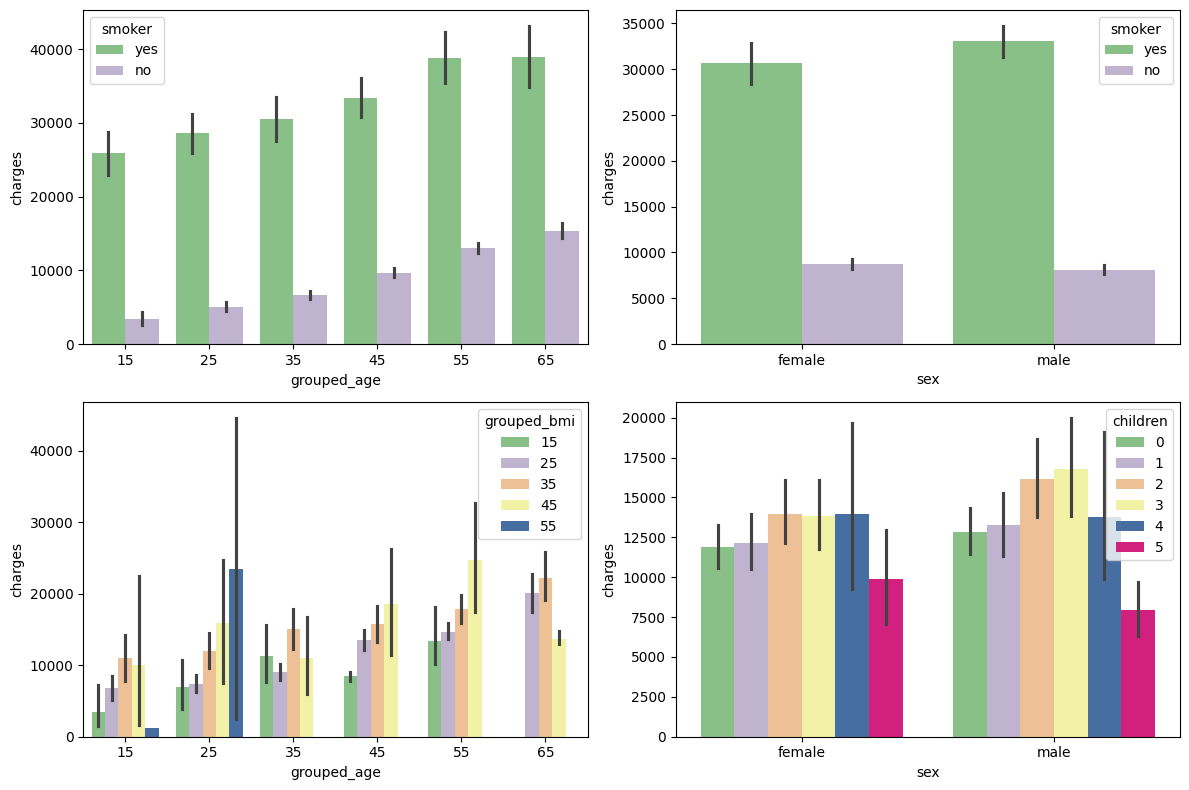

In [ ]:
# Group both age and bmi to obtain readble graphs

agg_total_data = total_data.copy()
agg_total_data['grouped_age'] = agg_total_data['age'].apply(range_value)
agg_total_data['grouped_bmi'] = agg_total_data['bmi'].apply(range_value)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(x='grouped_age', y='charges', hue='smoker', data=agg_total_data, palette='Accent',ax=axes[0,0],)
sns.barplot(x='sex', y='charges', hue='smoker', data=agg_total_data, palette='Accent',ax=axes[0,1])
sns.barplot(x='grouped_age', y='charges', hue='grouped_bmi', data=agg_total_data, palette='Accent',ax=axes[1,0])
sns.barplot(x='sex', y='charges', hue='children', data=agg_total_data, palette='Accent',ax=axes[1,1])

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()


Conclusions:
- The charges increases as older is the person and for smokers.
- There are more male smokers than female.
- The bmi increases in many cases as older is the person.
- There is no penalization for having children based on gender.

In [ ]:
# We will copy the dataset to factorize the categorical variables in a new one:

fact_data = total_data.copy()
fact_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
fact_data["sex"] = pd.factorize(fact_data["sex"])[0]
fact_data["smoker"] = pd.factorize(fact_data["smoker"])[0]
fact_data["region"] = pd.factorize(fact_data["region"])[0]

fact_data.head

<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       0       0  16884.92400
1      18    1  33.770         1       1       1   1725.55230
2      28    1  33.000         3       1       1   4449.46200
3      33    1  22.705         0       1       2  21984.47061
4      32    1  28.880         0       1       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       1       2  10600.54830
1334   18    0  31.920         0       1       3   2205.98080
1335   18    0  36.850         0       1       1   1629.83350
1336   21    0  25.800         0       1       0   2007.94500
1337   61    0  29.070         0       0       2  29141.36030

[1338 rows x 7 columns]>

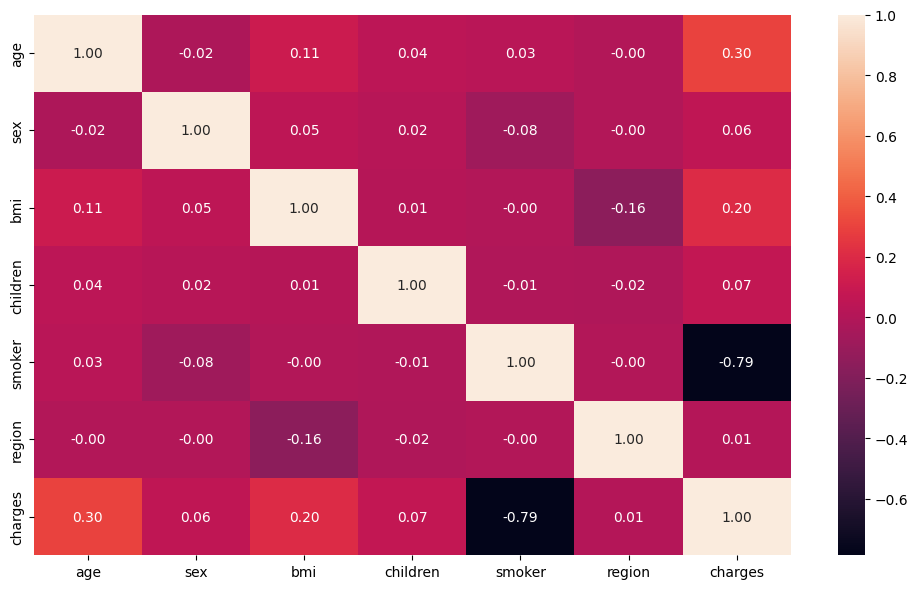

In [ ]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(fact_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusions: 

- From the graph we  can conclude that our target variable has significant correlations with smoker, age and bmi.
- Charges are higher for smokers than for non-smokers. That is the most important correlation.
- Charges rise with age.
- Charges rise with bmi.


In [ ]:
# Outlier Analysis:

fact_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


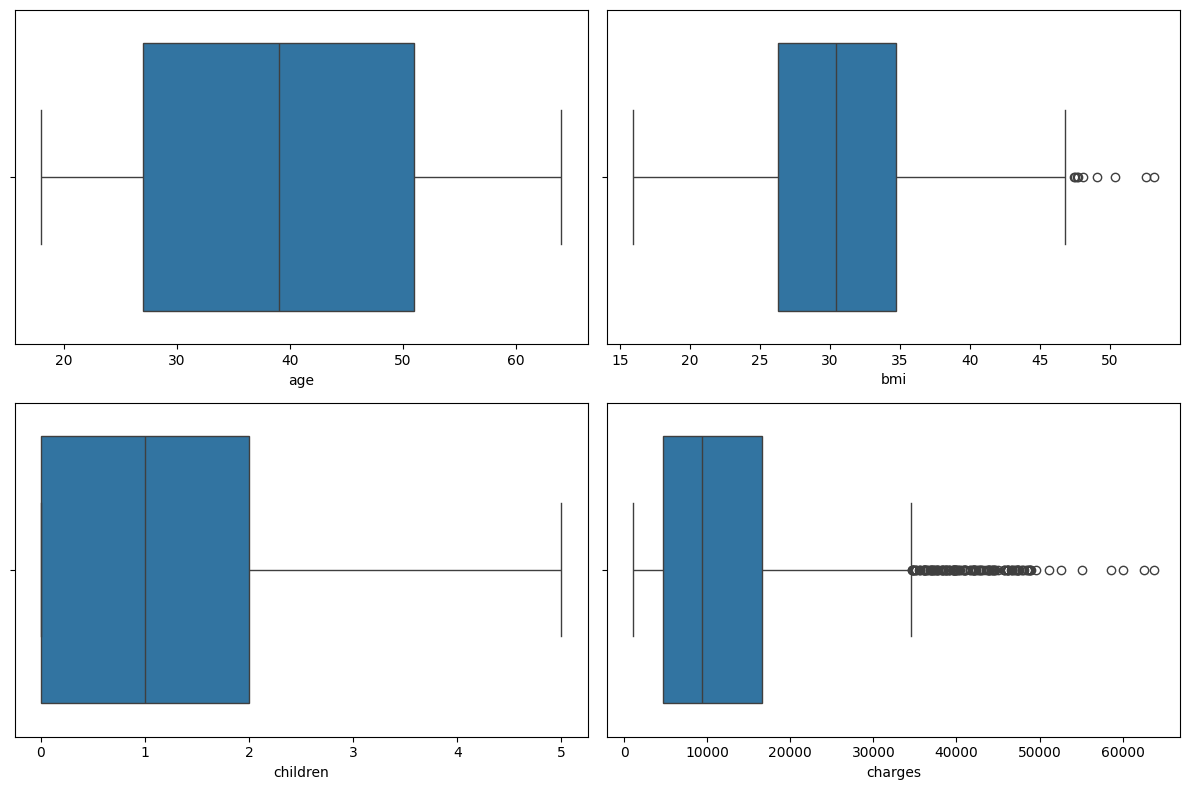

In [ ]:
# Boxplots to Observe Outliers 

fig, axis = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(ax=axis[0,0], data=fact_data, x = 'age')
sns.boxplot(ax=axis[0,1], data=fact_data, x = 'bmi')
sns.boxplot(ax=axis[1,0], data=fact_data, x = 'children')
sns.boxplot(ax=axis[1,1], data=fact_data, x = 'charges')

plt.tight_layout()

plt.show()

In [ ]:
# Creating the variable for no outliers

fact_data_no_outliers = fact_data.copy()

In [ ]:
# BMI Analysis

bmi_stats = fact_data['bmi'].describe()
print(bmi_stats)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [ ]:
# BMI IQR

bmi_iqr = bmi_stats['75%'] - bmi_stats['25%']
upper_limit = bmi_stats['75%'] + 1.5 * bmi_iqr
lower_limit = bmi_stats['25%'] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


In [ ]:
# Trimm the Outliers 

bmi_outliers = fact_data[fact_data['bmi'] > 47.29].shape
print(bmi_outliers)


(9, 7)


In [ ]:
rows_trimm = fact_data_no_outliers[fact_data_no_outliers['bmi'] > 47.29].index

fact_data_no_outliers.drop(rows_trimm, axis=0, inplace=True)
fact_data_no_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [ ]:
fact_data_no_outliers.reset_index(drop=True, inplace=True)

In [ ]:
# Looking for null values
fact_data_no_outliers.isnull().sum()
fact_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Saving data

fact_data.to_csv("/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/fact_data.csv", index = False)
fact_data_no_outliers.to_csv("/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/fact_data_no_outliers.csv", index = False)

In [ ]:
# Featuring Scaling

# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex", "smoker", "region", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(fact_data[num_variables])
fact_data_scal = pd.DataFrame(scal_features, index = fact_data.index, columns = num_variables)
fact_data_scal.head()

,age,bmi,children,sex,smoker,region,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [ ]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples

X = fact_data_scal.drop("charges", axis = 1)
y = fact_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KBest Selection for the best Features

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [ ]:
X_train_sel['charges'] = list(y_train)
X_test_sel['charges'] = list(y_test)
X_train_sel.to_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_train-insurance.csv', index=False)
X_test_sel.to_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_test-insurance.csv', index=False)

### Linear Regression Model

In [ ]:
# Import cleanned data

train_data = pd.read_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_train-insurance.csv')
test_data = pd.read_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_test-insurance.csv')

train_data.head()

,age,bmi,children,smoker,charges
0,0.608696,0.107345,0.4,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,1.0,0.119316
4,0.782609,0.148238,0.6,1.0,0.181225


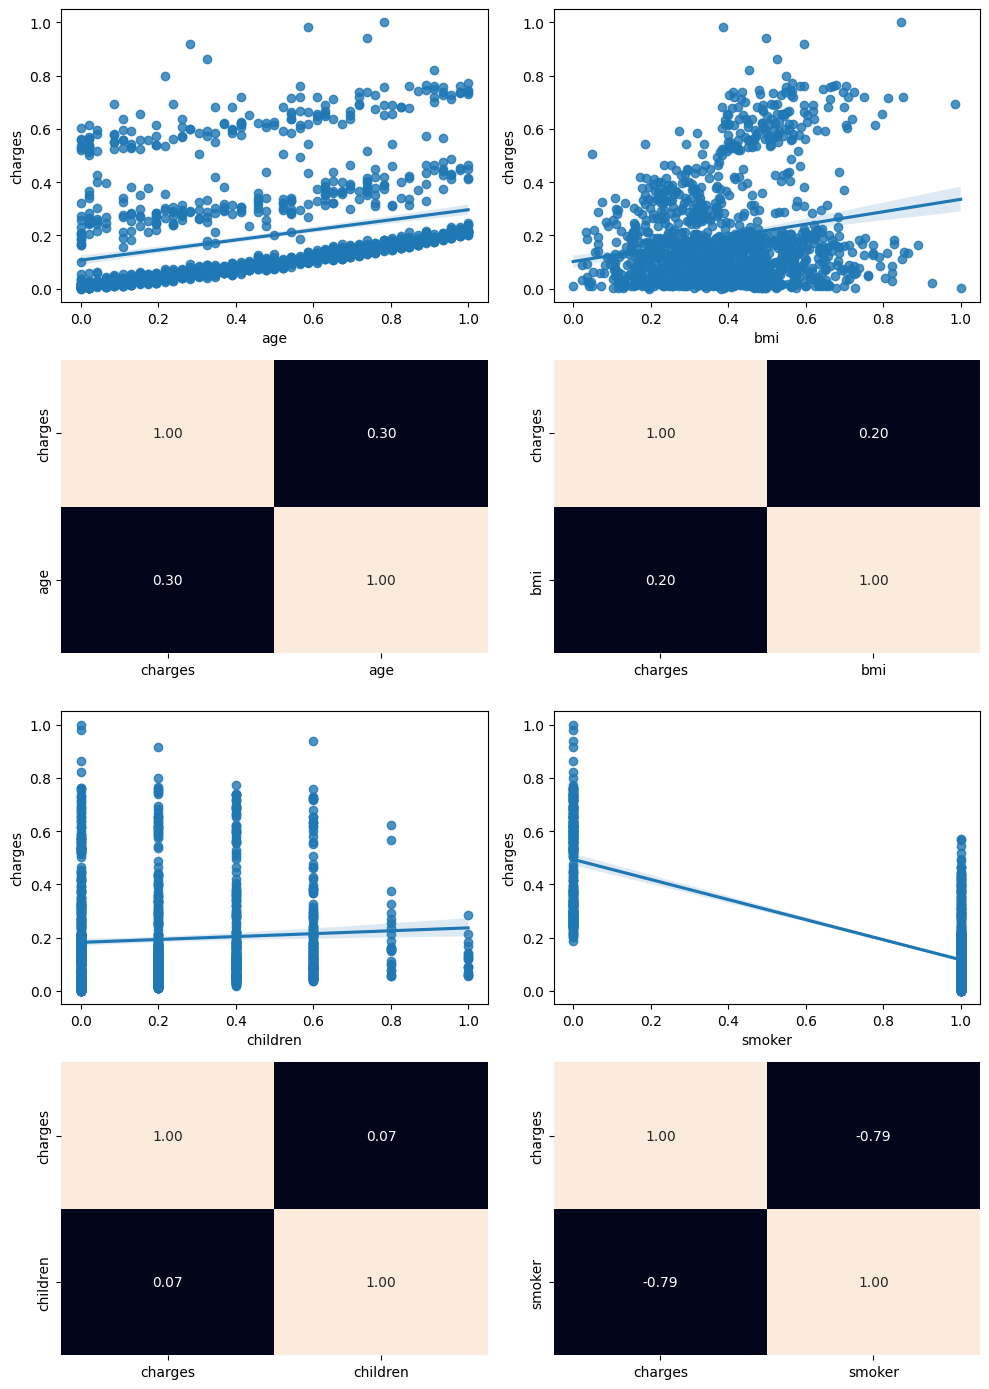

In [ ]:
# Regplot y Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [ ]:
# Train the model

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Parameter Fitting

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 0.3235318834651257
Coefficients (b1, b2): [ 0.18875573  0.19432238  0.03409496 -0.37755399]


In [ ]:
# Model Prediction

y_pred = model.predict(X_test)

In [ ]:
# Test The Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008658096232451859
Coefficient of determination: 0.7811147722517886


A Linear Regression model does not have hyperparameters to optimise. We must use another model to perform improvements like a regularized model.

- age - numerical
- sex - categorical
- bmi - numerical
- children - numerical
- smoker - categorical
- region - categorical
- charges --> target - numerical